# Data Ingestion

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("../data/Churn_prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [4]:
df=df.drop(columns=["customerID"])

# Data Cleaning And Outliner Handling

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(14)

In [10]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
601,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
852,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1102,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
2114,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
2608,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
2933,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.9,Yes
4216,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
4724,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
4975,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.3,Yes
5066,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1,Yes


In [12]:
df = df.drop_duplicates()

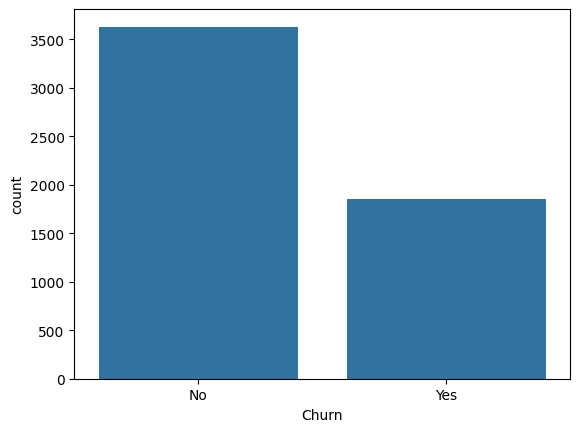

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.show()


In [14]:

cols = df.columns.tolist()
numerical_cols = []
categorical_cols = []

for col in cols:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

    print(f"{col} has these unique values: {df[col].unique()}")


gender has these unique values: ['Male' 'Female']
SeniorCitizen has these unique values: [0 1]
Partner has these unique values: ['No' 'Yes']
Dependents has these unique values: ['No' 'Yes']
tenure has these unique values: [34  2 45  8 28 62 13 16 49 69 52 10  1 12 58 47 72 17 71 27  5 11 70 63
 15 60 18  9 31 50  7 35 48 46 66 25 38 68 32 55 37 64 36 41  6  3 33 67
 43 57 61 65 30 22 20 53  4 14 40 59 24 19 29 54 42 51 23 21 44  0 56 39
 26]
PhoneService has these unique values: ['Yes' 'No']
MultipleLines has these unique values: ['No' 'No phone service' 'Yes']
InternetService has these unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity has these unique values: ['Yes' 'No' 'No internet service']
OnlineBackup has these unique values: ['No' 'Yes' 'No internet service']
DeviceProtection has these unique values: ['Yes' 'No' 'No internet service']
TechSupport has these unique values: ['No' 'Yes' 'No internet service']
StreamingTV has these unique values: ['No' 'Yes' 'No internet servi

In [15]:
df.replace({
    'TotalCharges':{' ':np.nan}
}, inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_31472\2204722093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({


In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

C:\Users\aryan\AppData\Local\Temp\ipykernel_31472\3174716150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [17]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
302,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
466,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
587,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
689,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
854,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2131,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
2440,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2837,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
3675,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5127,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:

cols = df.columns.tolist()
numerical_cols = []
categorical_cols = []

for col in cols:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

    print(f"{col} has these unique values: {df[col].unique()}")


gender has these unique values: ['Male' 'Female']
SeniorCitizen has these unique values: [0 1]
Partner has these unique values: ['No' 'Yes']
Dependents has these unique values: ['No' 'Yes']
tenure has these unique values: [34  2 45  8 28 62 13 16 49 69 52 10  1 12 58 47 72 17 71 27  5 11 70 63
 15 60 18  9 31 50  7 35 48 46 66 25 38 68 32 55 37 64 36 41  6  3 33 67
 43 57 61 65 30 22 20 53  4 14 40 59 24 19 29 54 42 51 23 21 44  0 56 39
 26]
PhoneService has these unique values: ['Yes' 'No']
MultipleLines has these unique values: ['No' 'No phone service' 'Yes']
InternetService has these unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity has these unique values: ['Yes' 'No' 'No internet service']
OnlineBackup has these unique values: ['No' 'Yes' 'No internet service']
DeviceProtection has these unique values: ['Yes' 'No' 'No internet service']
TechSupport has these unique values: ['No' 'Yes' 'No internet service']
StreamingTV has these unique values: ['No' 'Yes' 'No internet servi

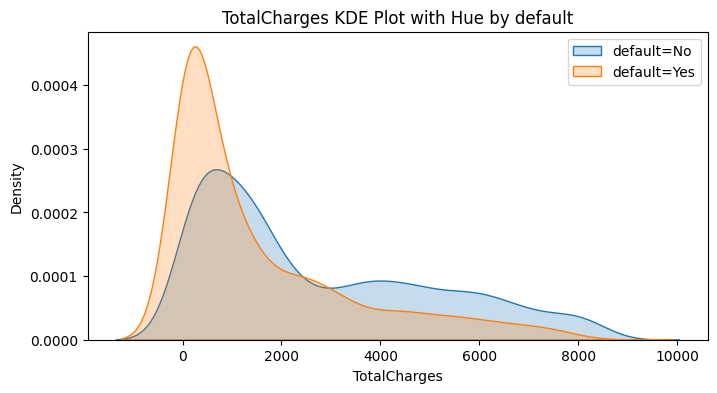

In [21]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df["TotalCharges"][df['Churn'] == "No"], fill=True, label='default=No')
sns.kdeplot(df["TotalCharges"][df['Churn'] == "Yes"], fill=True, label='default=Yes')
plt.title(f"TotalCharges KDE Plot with Hue by default")
plt.legend()
plt.show()

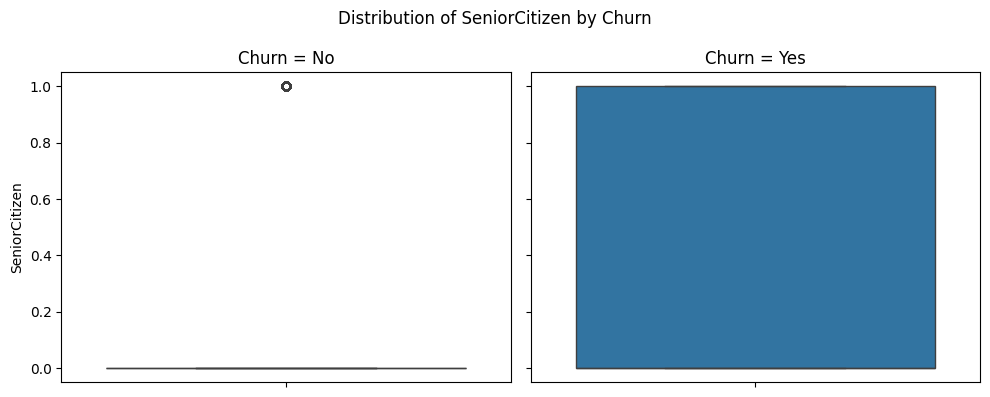

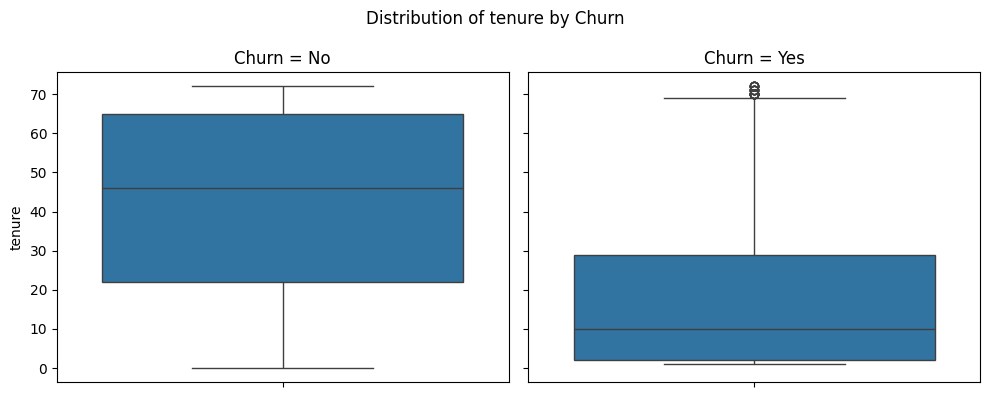

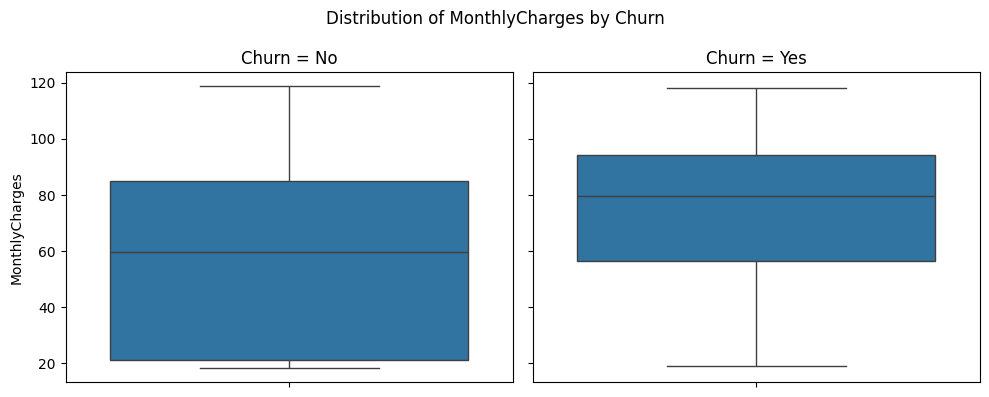

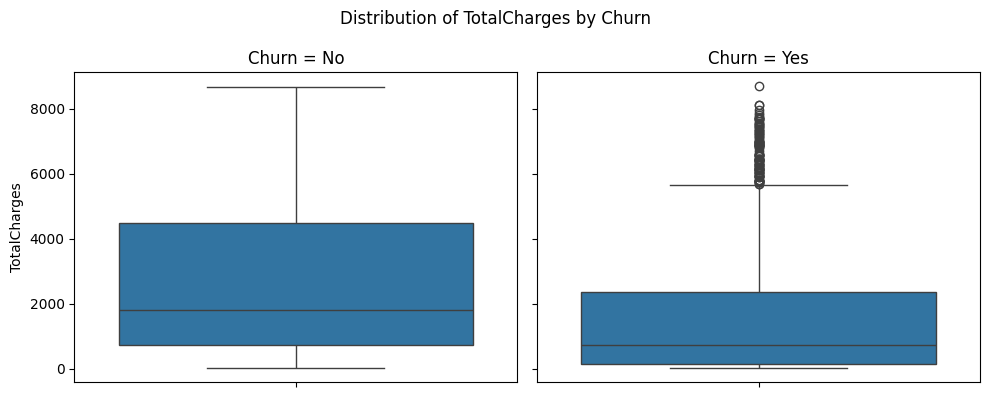

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    sns.boxplot(
        data=df[df["Churn"] == "No"],
        y=col,
        ax=axes[0],
        fill=True
    )
    axes[0].set_title("Churn = No")

    sns.boxplot(
        data=df[df["Churn"] == "Yes"],
        y=col,
        ax=axes[1],
        fill=True
    )
    axes[1].set_title("Churn = Yes")

    fig.suptitle(f"Distribution of {col} by Churn", fontsize=12)
    plt.tight_layout()
    plt.show()


In [23]:
def get_iqr_bounds(data):
    Q1,Q3=data.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

In [24]:
lower_bound,upper_bound=get_iqr_bounds(df[df["Churn"]=="Yes"].TotalCharges)

In [25]:
lower_bound,upper_bound

(-3166.05, 5651.95)

In [27]:
mask = (df["Churn"] == "Yes") & (df["TotalCharges"] > upper_bound)

mean_yes = df.loc[df["Churn"] == "Yes", "TotalCharges"].mean()

df.loc[mask, "TotalCharges"] = mean_yes

In [28]:
mean_no = df[df["Churn"] == "No"]["TotalCharges"].mean()
df.loc[df['TotalCharges'].isna(), "TotalCharges"] = mean_no

# Data Visualization

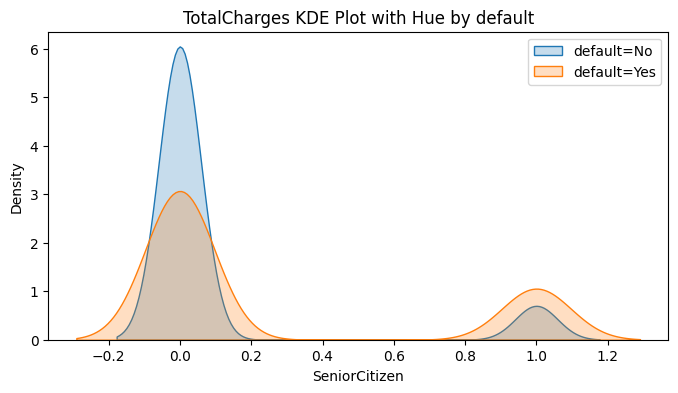

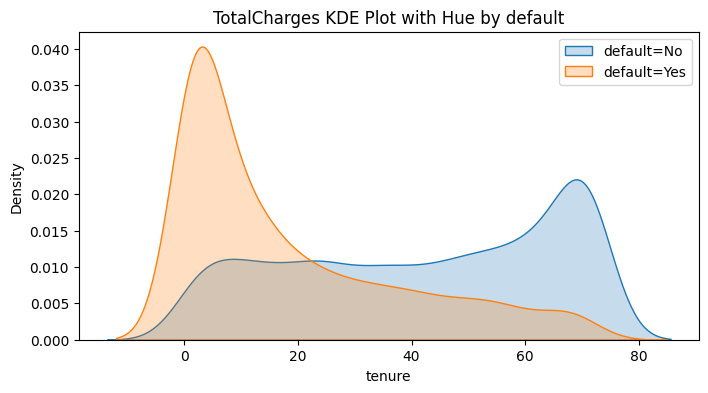

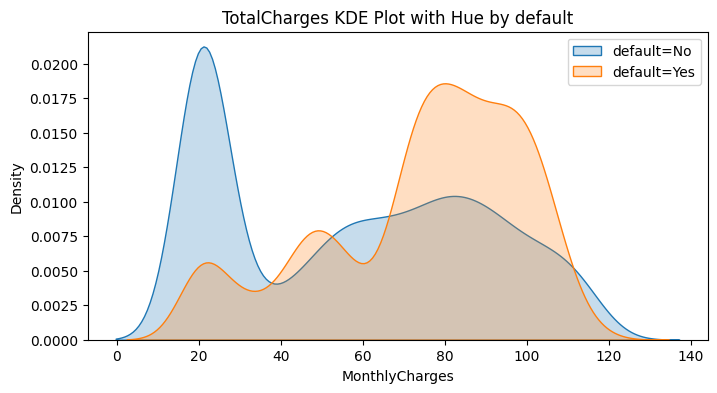

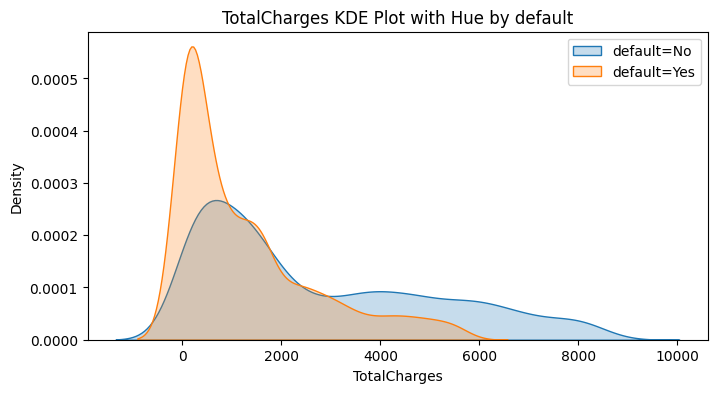

In [30]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col][df['Churn'] == "No"], fill=True, label='default=No')
    sns.kdeplot(df[col][df['Churn'] == "Yes"], fill=True, label='default=Yes')
    plt.title(f"TotalCharges KDE Plot with Hue by default")
    plt.legend()
    plt.show()

ValueError: cannot insert Churn, already exists

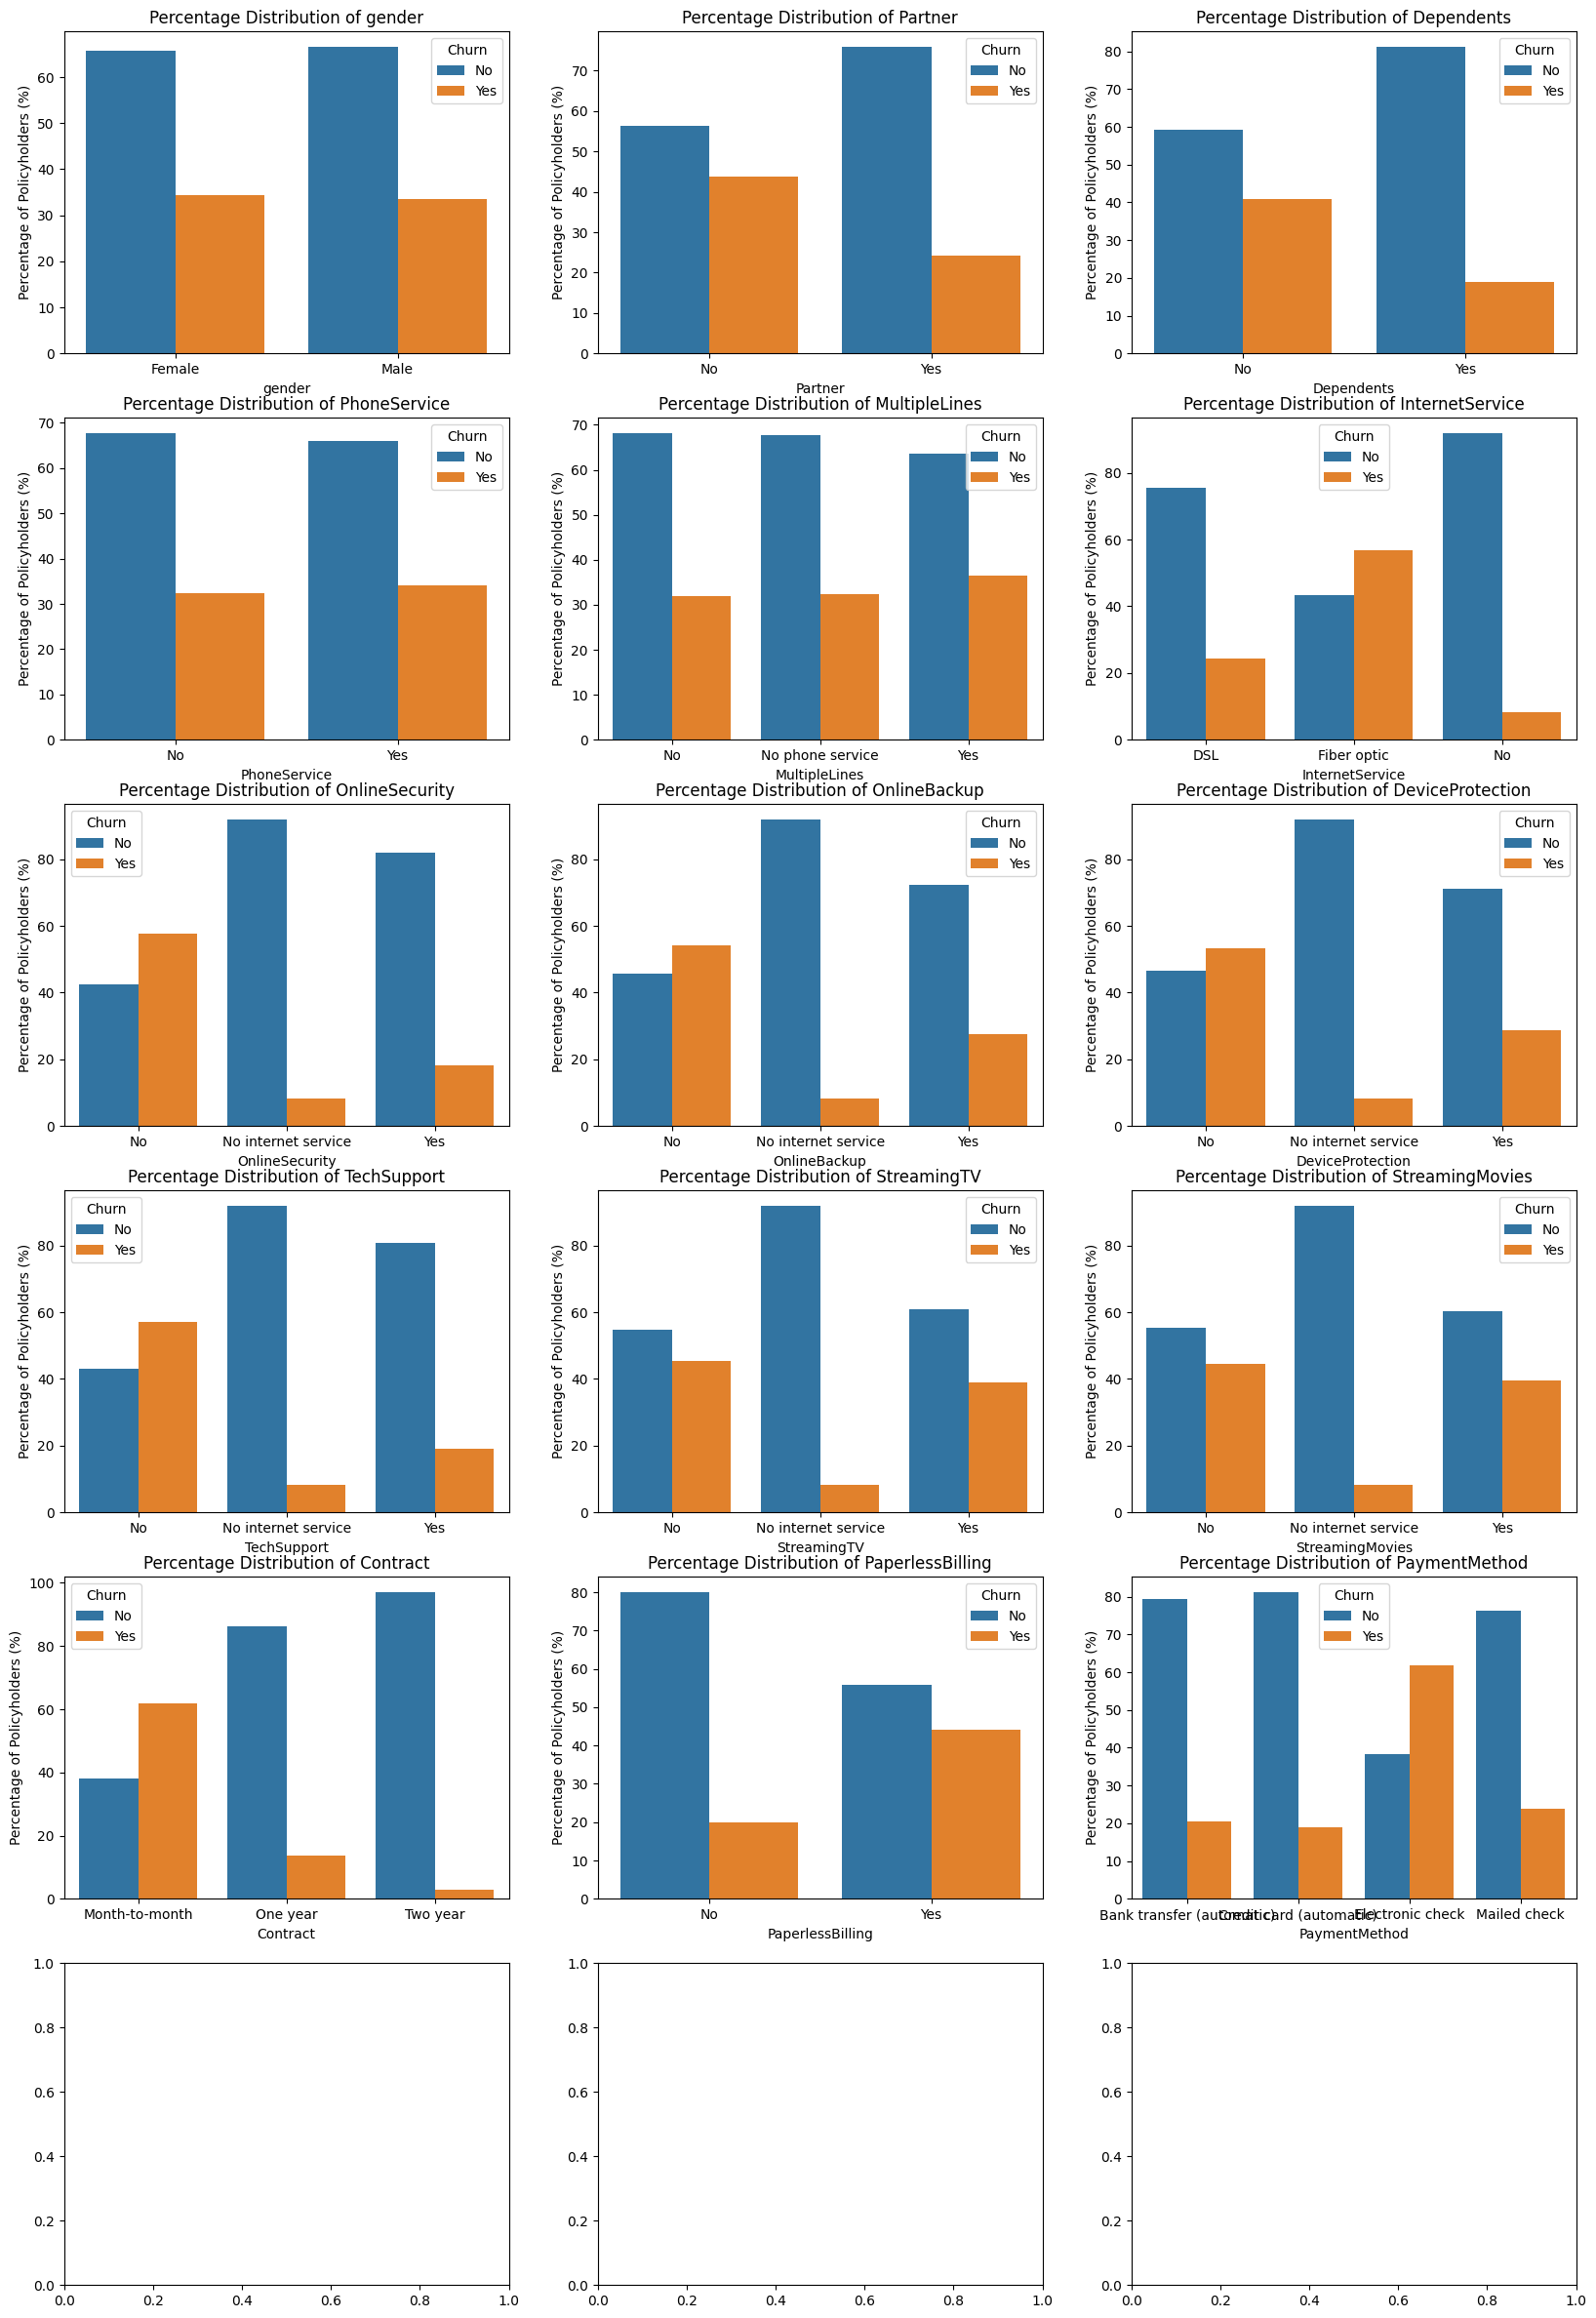

In [34]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.flatten()

for ax, column in zip(axes, categorical_cols):
    # Count occurrences grouped by churn and the category
    count_data = df.groupby(['Churn', column]).size().reset_index(name='count')

    # Calculate percentage within each category (column)
    total_per_category = count_data.groupby(column)['count'].transform('sum')
    count_data['percentage'] = (count_data['count'] / total_per_category) * 100

    # Plot percentage distribution
    sns.barplot(data=count_data, x=column, y='percentage', hue='Churn', ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

### Feature Engineering And Selection

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
encoding_cols=["PhoneService","Dependents","Partner","PaperlessBilling","Churn"]
one_hot_encoding=["MultipleLines",'InternetService', 'OnlineSecurity',"gender",
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','Contract','PaymentMethod']

In [38]:
for col in encoding_cols:
    df[col]=df[col].map({"No":0,"Yes":1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
1,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
2,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
3,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
4,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1


In [39]:
df1=df.copy()
col1=df.drop("Churn",axis=1).columns.tolist()
df1 = pd.get_dummies(df1, columns=one_hot_encoding, drop_first=True, dtype=int)
df1

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,34,1,0,56.95,1889.50,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,8,1,1,99.65,820.50,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,24,1,1,84.80,1990.50,0,0,...,1,0,1,0,1,1,0,0,0,1
5496,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,0,1,0,1,1,0,1,0,0
5497,0,1,1,11,0,1,29.60,346.45,0,1,...,0,0,0,0,0,0,0,0,1,0
5498,1,1,0,4,1,1,74.40,306.60,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'gender_Male', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

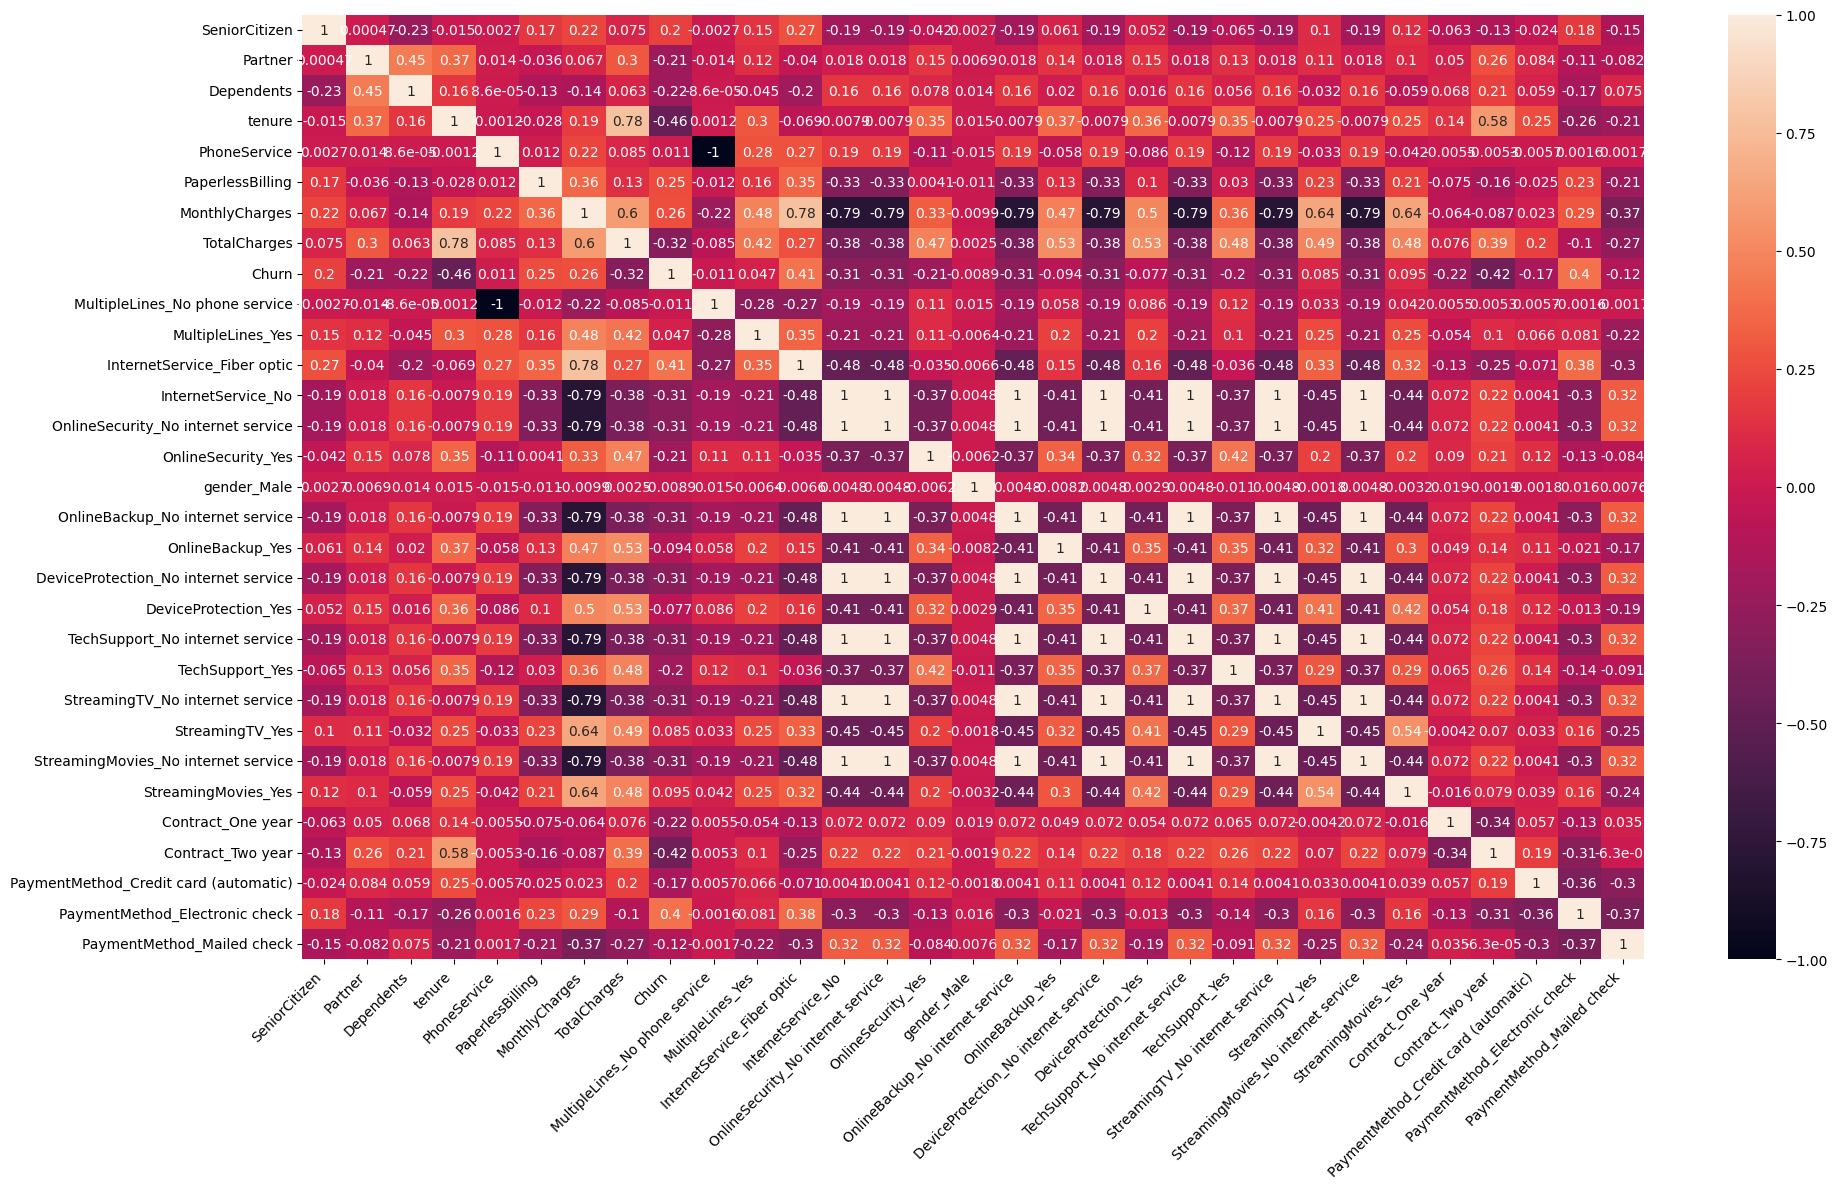

In [43]:
cm = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
X=df1.drop("Churn",axis=1)
y=df1["Churn"]

In [45]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
print(mi_df.sort_values(by="MI Score", ascending=False))

                                  Feature  MI Score
3                                  tenure  0.137824
7                            TotalCharges  0.115153
26                      Contract_Two year  0.110658
28         PaymentMethod_Electronic check  0.083501
10            InternetService_Fiber optic  0.081510
6                          MonthlyCharges  0.077213
23    StreamingMovies_No internet service  0.060788
17   DeviceProtection_No internet service  0.058822
15       OnlineBackup_No internet service  0.057681
11                     InternetService_No  0.057121
12     OnlineSecurity_No internet service  0.057086
21        StreamingTV_No internet service  0.050048
19        TechSupport_No internet service  0.049161
13                     OnlineSecurity_Yes  0.029310
5                        PaperlessBilling  0.026105
25                      Contract_One year  0.026104
1                                 Partner  0.025687
27  PaymentMethod_Credit card (automatic)  0.021847
2           

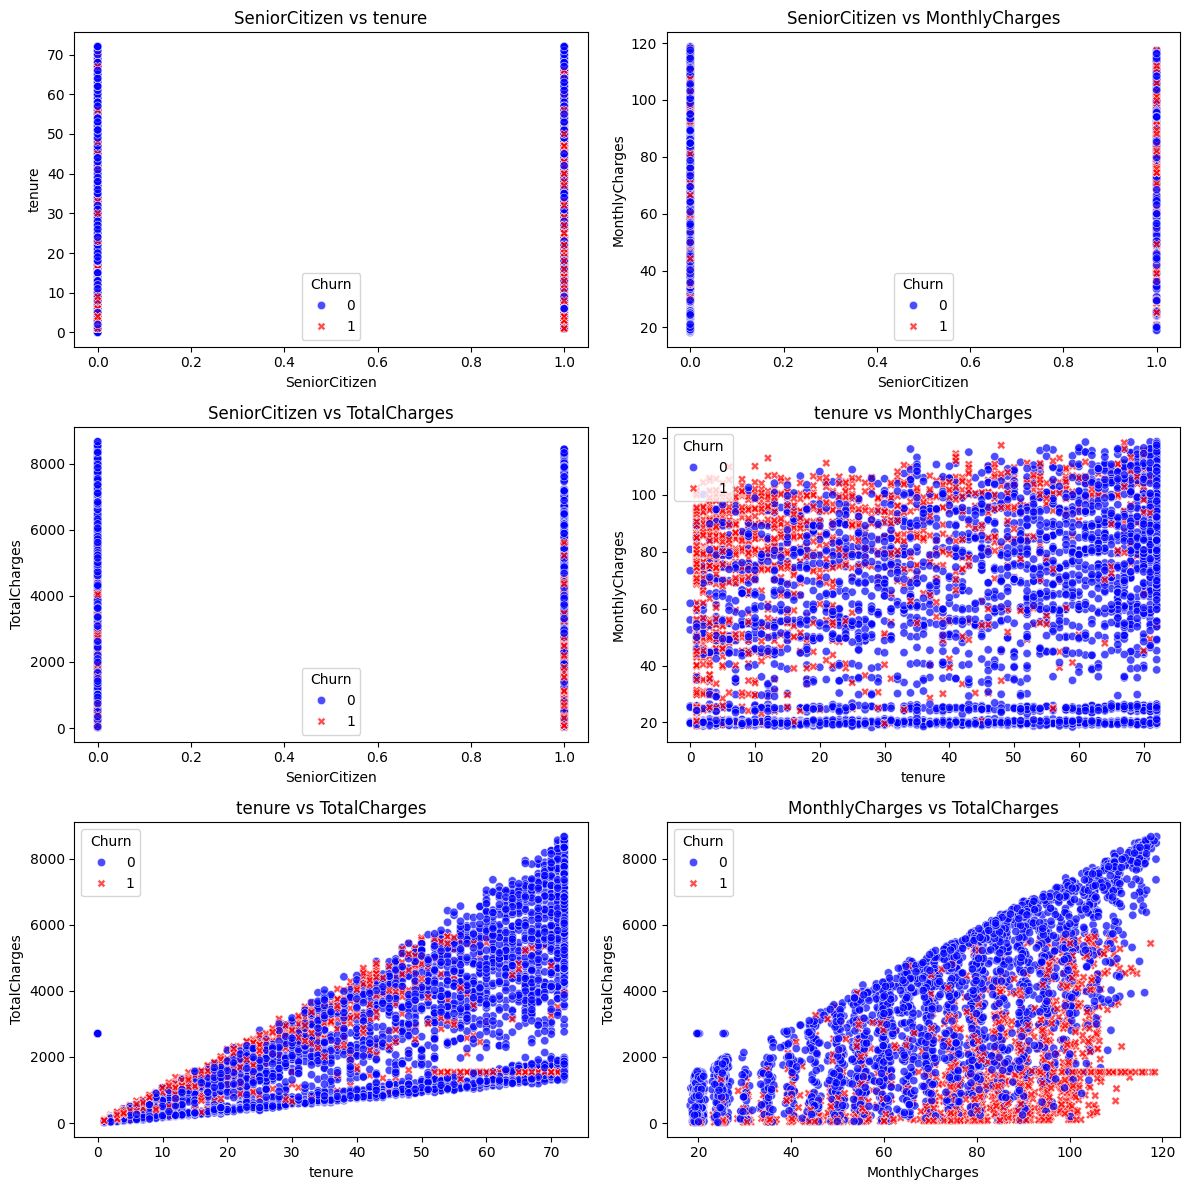

In [59]:
pairs = []
for i in range(0, 4):
    for j in range(i + 1, 4):
        pairs.append((numerical_cols[i], numerical_cols[j]))

ncols = 2
nrows = math.ceil(len(pairs) / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for ax, (x_col, y_col) in zip(axes, pairs):
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue="Churn",
        style="Churn",
        palette={1: "red", 0: "blue"},
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{x_col} vs {y_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.legend(title="Churn")

# Remove empty subplots
for ax in axes[len(pairs):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [61]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [64]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

poly_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly_array = poly.fit_transform(X[poly_cols])

In [65]:
X_poly_array

array([[3.40000000e+01, 5.69500000e+01, 1.88950000e+03, ...,
        3.24330250e+03, 1.07607025e+05, 3.57021025e+06],
       [2.00000000e+00, 5.38500000e+01, 1.08150000e+02, ...,
        2.89982250e+03, 5.82387750e+03, 1.16964225e+04],
       [4.50000000e+01, 4.23000000e+01, 1.84075000e+03, ...,
        1.78929000e+03, 7.78637250e+04, 3.38836056e+06],
       ...,
       [1.10000000e+01, 2.96000000e+01, 3.46450000e+02, ...,
        8.76160000e+02, 1.02549200e+04, 1.20027602e+05],
       [4.00000000e+00, 7.44000000e+01, 3.06600000e+02, ...,
        5.53536000e+03, 2.28110400e+04, 9.40035600e+04],
       [6.60000000e+01, 1.05650000e+02, 6.84450000e+03, ...,
        1.11619225e+04, 7.23121425e+05, 4.68471802e+07]])

In [67]:
poly_feature_names = poly.get_feature_names_out(poly_cols)

X_poly_df = pd.DataFrame(
    X_poly_array,
    columns=poly_feature_names,
    index=X.index
)
X_poly_df

,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2
0,34.0,56.95,1889.50,1156.0,1936.3,64243.00,3243.3025,107607.0250,3.570210e+06
1,2.0,53.85,108.15,4.0,107.7,216.30,2899.8225,5823.8775,1.169642e+04
2,45.0,42.30,1840.75,2025.0,1903.5,82833.75,1789.2900,77863.7250,3.388361e+06
3,2.0,70.70,151.65,4.0,141.4,303.30,4998.4900,10721.6550,2.299772e+04
4,8.0,99.65,820.50,64.0,797.2,6564.00,9930.1225,81762.8250,6.732202e+05
...,...,...,...,...,...,...,...,...,...
5495,24.0,84.80,1990.50,576.0,2035.2,47772.00,7191.0400,168794.4000,3.962090e+06
5496,72.0,103.20,7362.90,5184.0,7430.4,530128.80,10650.2400,759851.2800,5.421230e+07
5497,11.0,29.60,346.45,121.0,325.6,3810.95,876.1600,10254.9200,1.200276e+05
5498,4.0,74.40,306.60,16.0,297.6,1226.40,5535.3600,22811.0400,9.400356e+04


In [68]:
X_rest = X.drop(columns=poly_cols)

X_poly_final = pd.concat([X_rest, X_poly_df], axis=1)

In [69]:
X_poly_final

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2
0,0,0,0,1,0,0,0,0,0,0,...,1,34.0,56.95,1889.50,1156.0,1936.3,64243.00,3243.3025,107607.0250,3.570210e+06
1,0,0,0,1,1,0,0,0,0,0,...,1,2.0,53.85,108.15,4.0,107.7,216.30,2899.8225,5823.8775,1.169642e+04
2,0,0,0,0,0,1,0,0,0,0,...,0,45.0,42.30,1840.75,2025.0,1903.5,82833.75,1789.2900,77863.7250,3.388361e+06
3,0,0,0,1,1,0,0,1,0,0,...,0,2.0,70.70,151.65,4.0,141.4,303.30,4998.4900,10721.6550,2.299772e+04
4,0,0,0,1,1,0,1,1,0,0,...,0,8.0,99.65,820.50,64.0,797.2,6564.00,9930.1225,81762.8250,6.732202e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,1,1,0,1,0,0,0,...,1,24.0,84.80,1990.50,576.0,2035.2,47772.00,7191.0400,168794.4000,3.962090e+06
5496,0,1,1,1,1,0,1,1,0,0,...,0,72.0,103.20,7362.90,5184.0,7430.4,530128.80,10650.2400,759851.2800,5.421230e+07
5497,0,1,1,0,1,1,0,0,0,0,...,0,11.0,29.60,346.45,121.0,325.6,3810.95,876.1600,10254.9200,1.200276e+05
5498,1,1,0,1,1,0,1,1,0,0,...,1,4.0,74.40,306.60,16.0,297.6,1226.40,5535.3600,22811.0400,9.400356e+04


# Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [93]:
X_scaled=X.copy()
scaler = StandardScaler()
X_scaled[poly_cols] = scaler.fit_transform(X_scaled[poly_cols])
X_scaled

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,-0.007234,1,0,-0.211313,-0.148576,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,-1.290081,1,1,-0.312803,-0.963013,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0.433744,0,0,-0.690937,-0.170864,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,-1.290081,1,1,0.238846,-0.943125,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,-1.049547,1,1,1.186634,-0.637325,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,-0.408124,1,1,0.700463,-0.102398,0,1,...,1,0,1,0,1,1,0,0,0,1
5496,0,1,1,1.516146,1,1,1.302857,2.353875,0,1,...,0,0,1,0,1,1,0,1,0,0
5497,0,1,1,-0.929280,0,1,-1.106720,-0.854062,1,0,...,0,0,0,0,0,0,0,0,1,0
5498,1,1,0,-1.209903,1,1,0.359979,-0.872281,0,1,...,0,0,0,0,0,0,0,0,0,1


In [97]:
poly_scaling_cols=['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure^2',
       'tenure MonthlyCharges', 'tenure TotalCharges', 'MonthlyCharges^2',
       'MonthlyCharges TotalCharges', 'TotalCharges^2']

In [98]:
X_poly_final_scaled=X_poly_final.copy()
scaler = StandardScaler()
X_poly_final_scaled[poly_scaling_cols] = scaler.fit_transform(X_poly_final_scaled[poly_scaling_cols])
X_poly_final_scaled

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2
0,0,0,0,1,0,0,0,0,0,0,...,1,-0.007234,-0.211313,-0.148576,-0.343208,-0.164015,-0.351472,-0.450832,-0.321498,-0.396080
1,0,0,0,1,1,0,0,0,0,0,...,1,-1.290081,-0.312803,-0.963013,-0.966306,-0.968552,-0.770122,-0.541398,-0.770459,-0.626475
2,0,0,0,0,0,1,0,0,0,0,...,0,0.433744,-0.690937,-0.170864,0.126819,-0.178446,-0.229913,-0.834215,-0.452694,-0.407854
3,0,0,0,1,1,0,0,1,0,0,...,0,-1.290081,0.238846,-0.943125,-0.966306,-0.953724,-0.769553,0.011964,-0.748855,-0.625743
4,0,0,0,1,1,0,1,1,0,0,...,0,-1.049547,1.186634,-0.637325,-0.933853,-0.665189,-0.728617,1.312302,-0.435496,-0.583645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,1,1,0,1,0,0,0,...,1,-0.408124,0.700463,-0.102398,-0.656921,-0.120501,-0.459171,0.590080,-0.051604,-0.370708
5496,0,1,1,1,1,0,1,1,0,0,...,0,1.516146,1.302857,2.353875,1.835469,2.253247,2.694806,1.502177,2.555520,2.882726
5497,0,1,1,0,1,1,0,0,0,0,...,0,-0.929280,-1.106720,-0.854062,-0.903022,-0.872681,-0.746618,-1.074983,-0.750914,-0.619461
5498,1,1,0,1,1,0,1,1,0,0,...,1,-1.209903,0.359979,-0.872281,-0.959815,-0.885000,-0.763517,0.153522,-0.695529,-0.621146


# Model Training

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [113]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_poly_final, y, test_size=0.30, random_state=10)
X2_train,X2_test,y2_train,y2_test=train_test_split(X, y, test_size=0.30, random_state=10)
X3_train,X3_test,y3_train,y3_test=train_test_split(X_poly_final_scaled, y, test_size=0.30, random_state=10)
X4_train,X4_test,y4_train,y4_test=train_test_split(X_scaled, y, test_size=0.30, random_state=10)

In [114]:
dataset=[
    {"X_train":X1_train,"X_test":X1_test,"y_train":y1_train,"y_test":y1_test},
    {"X_train":X2_train,"X_test":X2_test,"y_train":y2_train,"y_test":y2_test},
    {"X_train":X3_train,"X_test":X3_test,"y_train":y3_train,"y_test":y3_test},
    {"X_train":X4_train,"X_test":X4_test,"y_train":y4_train,"y_test":y4_test}
        ]

In [115]:
i=1
for data in dataset:
    model_lr = LogisticRegression()
    X_train=data["X_train"]
    X_test=data["X_test"]
    y_train=data["y_train"]
    y_test=data["y_test"]
    model_lr.fit(X_train, y_train)
    y_pred=model_lr.predict(X_test)
    report=classification_report(y_test,y_pred)
    print(f"DataSet: {i}")
    i+=1
    print(report)

DataSet: 1
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1090
           1       0.73      0.77      0.75       556

    accuracy                           0.83      1646
   macro avg       0.81      0.81      0.81      1646
weighted avg       0.83      0.83      0.83      1646

DataSet: 2
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1090
           1       0.77      0.78      0.78       556

    accuracy                           0.85      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.85      0.85      0.85      1646

DataSet: 3
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1090
           1       0.79      0.82      0.80       556

    accuracy                           0.86      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.87      0.86      0.

C:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

In [116]:
i=1
for data in dataset:
    model_svc = SVC()
    X_train=data["X_train"]
    X_test=data["X_test"]
    y_train=data["y_train"]
    y_test=data["y_test"]
    model_svc.fit(X_train, y_train)
    y_pred=model_svc.predict(X_test)
    report=classification_report(y_test,y_pred)
    print(f"DataSet: {i}")
    i+=1
    print(report)

C:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

DataSet: 1
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1090
           1       0.00      0.00      0.00       556

    accuracy                           0.66      1646
   macro avg       0.33      0.50      0.40      1646
weighted avg       0.44      0.66      0.53      1646

DataSet: 2
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1090
           1       0.62      0.46      0.52       556

    accuracy                           0.72      1646
   macro avg       0.69      0.66      0.66      1646
weighted avg       0.71      0.72      0.71      1646

DataSet: 3
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1090
           1       0.78      0.83      0.80       556

    accuracy                           0.86      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.87      0.86      0.

In [117]:
i=1
for data in dataset:
    model_dt = DecisionTreeClassifier()
    X_train=data["X_train"]
    X_test=data["X_test"]
    y_train=data["y_train"]
    y_test=data["y_test"]
    model_dt.fit(X_train, y_train)
    y_pred=model_dt.predict(X_test)
    report=classification_report(y_test,y_pred)
    print(f"DataSet: {i}")
    i+=1
    print(report)

DataSet: 1
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1090
           1       0.67      0.68      0.68       556

    accuracy                           0.78      1646
   macro avg       0.75      0.76      0.75      1646
weighted avg       0.78      0.78      0.78      1646

DataSet: 2
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1090
           1       0.70      0.71      0.71       556

    accuracy                           0.80      1646
   macro avg       0.78      0.78      0.78      1646
weighted avg       0.80      0.80      0.80      1646

DataSet: 3
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1090
           1       0.68      0.70      0.69       556

    accuracy                           0.79      1646
   macro avg       0.76      0.76      0.76      1646
weighted avg       0.79      0.79      0.

In [118]:
i=1
for data in dataset:
    model_rf = RandomForestClassifier()
    X_train=data["X_train"]
    X_test=data["X_test"]
    y_train=data["y_train"]
    y_test=data["y_test"]
    model_rf.fit(X_train, y_train)
    y_pred=model_rf.predict(X_test)
    report=classification_report(y_test,y_pred)
    print(f"DataSet: {i}")
    i+=1
    print(report)

DataSet: 1
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1090
           1       0.78      0.78      0.78       556

    accuracy                           0.85      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.85      0.85      0.85      1646

DataSet: 2
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1090
           1       0.79      0.79      0.79       556

    accuracy                           0.86      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.86      0.86      0.86      1646

DataSet: 3
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1090
           1       0.78      0.78      0.78       556

    accuracy                           0.85      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.85      0.85      0.

In [119]:
i=1
for data in dataset:
    model_xgb = XGBClassifier()
    X_train=data["X_train"]
    X_test=data["X_test"]
    y_train=data["y_train"]
    y_test=data["y_test"]
    model_xgb.fit(X_train, y_train)
    y_pred=model_xgb.predict(X_test)
    report=classification_report(y_test,y_pred)
    print(f"DataSet: {i}")
    i+=1
    print(report)

DataSet: 1
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1090
           1       0.77      0.77      0.77       556

    accuracy                           0.84      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.84      0.84      0.84      1646

DataSet: 2
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1090
           1       0.76      0.79      0.77       556

    accuracy                           0.84      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.85      0.84      0.85      1646

DataSet: 3
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1090
           1       0.77      0.77      0.77       556

    accuracy                           0.84      1646
   macro avg       0.83      0.83      0.83      1646
weighted avg       0.84      0.84      0.

**Dataset 3 Give Better result in all model**

In [122]:
df_comp=pd.concat([X_poly_final_scaled,y],axis=1)
df_comp

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2,Churn
0,0,0,0,1,0,0,0,0,0,0,...,-0.007234,-0.211313,-0.148576,-0.343208,-0.164015,-0.351472,-0.450832,-0.321498,-0.396080,0
1,0,0,0,1,1,0,0,0,0,0,...,-1.290081,-0.312803,-0.963013,-0.966306,-0.968552,-0.770122,-0.541398,-0.770459,-0.626475,1
2,0,0,0,0,0,1,0,0,0,0,...,0.433744,-0.690937,-0.170864,0.126819,-0.178446,-0.229913,-0.834215,-0.452694,-0.407854,0
3,0,0,0,1,1,0,0,1,0,0,...,-1.290081,0.238846,-0.943125,-0.966306,-0.953724,-0.769553,0.011964,-0.748855,-0.625743,1
4,0,0,0,1,1,0,1,1,0,0,...,-1.049547,1.186634,-0.637325,-0.933853,-0.665189,-0.728617,1.312302,-0.435496,-0.583645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,1,1,0,1,0,0,0,...,-0.408124,0.700463,-0.102398,-0.656921,-0.120501,-0.459171,0.590080,-0.051604,-0.370708,0
5496,0,1,1,1,1,0,1,1,0,0,...,1.516146,1.302857,2.353875,1.835469,2.253247,2.694806,1.502177,2.555520,2.882726,0
5497,0,1,1,0,1,1,0,0,0,0,...,-0.929280,-1.106720,-0.854062,-0.903022,-0.872681,-0.746618,-1.074983,-0.750914,-0.619461,0
5498,1,1,0,1,1,0,1,1,0,0,...,-1.209903,0.359979,-0.872281,-0.959815,-0.885000,-0.763517,0.153522,-0.695529,-0.621146,1


In [124]:
poly_scaling_cols=['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure^2',
       'tenure MonthlyCharges', 'tenure TotalCharges', 'MonthlyCharges^2',
       'MonthlyCharges TotalCharges', 'TotalCharges^2']
scaler = StandardScaler()
X_poly_final_scaled[poly_scaling_cols] = scaler.fit_transform(X_poly_final_scaled[poly_scaling_cols])
X_poly_final_scaled

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,tenure^2,tenure MonthlyCharges,tenure TotalCharges,MonthlyCharges^2,MonthlyCharges TotalCharges,TotalCharges^2
0,0,0,0,1,0,0,0,0,0,0,...,1,-0.007234,-0.211313,-0.148576,-0.343208,-0.164015,-0.351472,-0.450832,-0.321498,-0.396080
1,0,0,0,1,1,0,0,0,0,0,...,1,-1.290081,-0.312803,-0.963013,-0.966306,-0.968552,-0.770122,-0.541398,-0.770459,-0.626475
2,0,0,0,0,0,1,0,0,0,0,...,0,0.433744,-0.690937,-0.170864,0.126819,-0.178446,-0.229913,-0.834215,-0.452694,-0.407854
3,0,0,0,1,1,0,0,1,0,0,...,0,-1.290081,0.238846,-0.943125,-0.966306,-0.953724,-0.769553,0.011964,-0.748855,-0.625743
4,0,0,0,1,1,0,1,1,0,0,...,0,-1.049547,1.186634,-0.637325,-0.933853,-0.665189,-0.728617,1.312302,-0.435496,-0.583645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,1,1,1,1,0,1,0,0,0,...,1,-0.408124,0.700463,-0.102398,-0.656921,-0.120501,-0.459171,0.590080,-0.051604,-0.370708
5496,0,1,1,1,1,0,1,1,0,0,...,0,1.516146,1.302857,2.353875,1.835469,2.253247,2.694806,1.502177,2.555520,2.882726
5497,0,1,1,0,1,1,0,0,0,0,...,0,-0.929280,-1.106720,-0.854062,-0.903022,-0.872681,-0.746618,-1.074983,-0.750914,-0.619461
5498,1,1,0,1,1,0,1,1,0,0,...,1,-1.209903,0.359979,-0.872281,-0.959815,-0.885000,-0.763517,0.153522,-0.695529,-0.621146


# Exporting Dataset Details

In [125]:
import joblib

In [131]:
df_comp.to_csv("../data/final_dataset_for_Churn_Prediction.csv",index=False)

In [127]:
encoding_cols

['PhoneService', 'Dependents', 'Partner', 'PaperlessBilling', 'Churn']

In [128]:
one_hot_encoding

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'gender',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [129]:
poly_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [133]:
import joblib
export_data = {
    "encoding_cols": encoding_cols,
    "one_hot_encoding":one_hot_encoding,
    "poly_cols":poly_cols,
    "scalar_cols":poly_scaling_cols,
    "scaler": scaler,
}
joblib.dump(export_data, "../artifacts/dataset_detail.pkl")

['../artifacts/dataset_detail.pkl']